# Πανεπιστήμιο Θεσσαλίας

## Τμήμα Πληροφορικής με Εφαρμογές στη Βιοϊατρική

### Μάθημα:  Υπολογιστική Όραση
### Διδάσκων:  Κ. Δελήμπασης

### Τίτλος εργασίας: Υπολογισμός Γεωμετρικής Παραμόρφωσης

Εκπονήθηκε από τον:  
**Καπετάνιο Δημήτριο --  (Α.Μ. 01544)**

-> (σε συνεργασία με την Βασιλεία Γεωργάκη, 01726)

### Στόχος:

Η δοκιμή τεχνικών εντοπισμού σημείων ενδιαφέροντος σε μία εικόνα.

Η εικόνα είναι αποθηκευμένη σε αρχείο μορφής DICOM και χαρακτηρίζει μία συγκεκριμένη τομή ενός MRI phantom (ACR).

Θα πρέπει να εξαχθούν οι θέσεις των διασταυρώσεων του μαύρου πλέγματος.

Επίσης, ζητείται να προταθούν τρόποι υπολογισμού της γεωμετρικής παραμόρφωσης βάσει του κυκλικού σχήματος του phantom και του εντός του μαύρου πλέγματος.

### Βιβλιοθήκες & Πακέτα

In [1]:
import pydicom
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import scipy.ndimage

### Ανάγνωση αρχείου

Παρακάτω βρίσκεται η παράθεση ορισμένων στοιχείων που χαρακτηρίζουν αποκλειστικά το αρχείο DICOM.

In [2]:
# load the .dcm file, and access the individual attributes 
phantom = pydicom.dcmread('C:/Users/kapet/Desktop/cv/project2/MR.zzzMRI_QA.5.dcm')
print(phantom)
#print(phantom.keys) --- same result

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 162
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.2.19.45112.2013070209145157986408170
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.7
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20130703'
(0008, 0013) Instance Creation Time              TM: '144334.699000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.2.19.45112.2

In [3]:
print(phantom.Rows)
print(phantom.Columns)

256
256


In [4]:
print(len(phantom.PixelData))

131072


256 x 256  =  65.536 pixels

65536 x 2 bytes  =  131.072 elements

In [5]:
# You can also access a complete list of all attributes using the dir() function
attributes = dir(phantom)
print("\nAttributes:\n\n", attributes)


Attributes:

 ['AccessionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'DeviceSerialNumber', 'EchoTime', 'EchoTrainLength', 'FrameOfReferenceUID', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'InstitutionName', 'InstitutionalDepartmentName', 'MRAcquisitionType', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'PatientBirthDate', 'PatientID', 'PatientName', 'PatientPosition', 'PatientSex', 'PhotometricInterpretation', 'PixelData', 'PixelRepresentation', 'PixelSpacing', 'PositionReferenceIndicator', 'ReferringPhysicianName', 'RepetitionTime', 'Rows', 'SOPClassUID', 'SOPInstanceUID', 'SamplesPerPixel', 'ScanOptions', 'ScanningSequence', 'SequenceVariant', 'SeriesDate', 'SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber', 'SeriesTime', 'SliceLocation', 'SliceThickness', 'SoftwareVersions', 'SpecificCharacterSet', 'StationName', 'S

Κατάταξη όλων των μεταβλητών, των ιδιοτήτων, που συμπεριλαμβάνονται στο μελετηθέν αρχείο DICOM.

In [6]:
print(phantom.Manufacturer, phantom.ManufacturerModelName, phantom.DeviceSerialNumber)

SIEMENS Skyra 45112


Ονόματα: Κατασκευαστή, Μοντέλου, Σειριακού αριθμού συσκευής.

In [7]:
np.set_printoptions(threshold=None)
phantom_img = phantom.pixel_array
print(phantom.pixel_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
# Convert the array to a DataFrame
df = pd.DataFrame(phantom.pixel_array)

# Set the maximum number of rows and columns to display
pd.options.display.max_rows = 256
pd.options.display.max_columns = 256

# Print the DataFrame
print(df)

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
0      0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1      0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2      0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3      0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4      0    0    0    0    7    5    4    2    2    3    3    3    4    5   
5      0    0    0    0    5    3    4    5    4    4    5    3    2    4   
6      0    0    0    0    3    4    5    5    3    4    2    2    2    5   
7      0    0    0    0    6    5    4    4    2    3    3    3    5    6   
8      0    0    0    0    2    2    3    5    3    3    4    5    5    3   
9      0    0    0    0    4    4    4    5    7    5    4    3    2    4   
10     0    0    0    0    4    4    5    6    5    5    7    3    5    6   
11     0    0    0    0    5    4    5    5    6    4    3    4    2    3   

Στην συνέχεια ακολουθεί η απεικόνιση των δεδομένων.

In [9]:
plt.imsave('C:/Users/kapet/Desktop/cv/project2/img.png', phantom_img)

img = cv2.imread('C:/Users/kapet/Desktop/cv/project2/img.png')

Αφότου εισαχθεί η πληροφορία της εικόνας στη μεταβλητή «img» αποτυπώνεται.

Text(0.5, 1.0, 'Phantom')

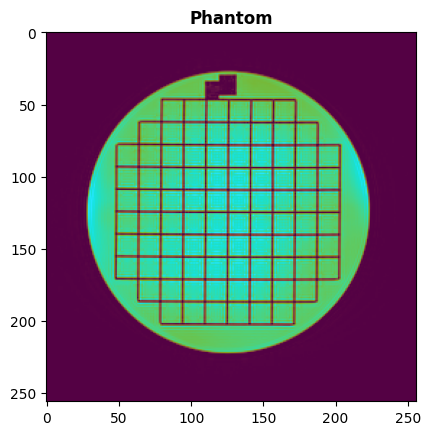

In [10]:
plt.imshow(img)
plt.title('Phantom', fontweight ="bold")

Μετατροπή της έγχρωμης εικόνας σε άγχρωμη για απλουστευμένη απεικόνιση.

In [11]:
plt.imsave('C:/Users/kapet/Desktop/cv/project2/img_gray.png', phantom_img, cmap='gray')

img_gray_scale = cv2.imread('C:/Users/kapet/Desktop/cv/project2/img_gray.png')

Text(0.5, 1.0, 'Phantom')

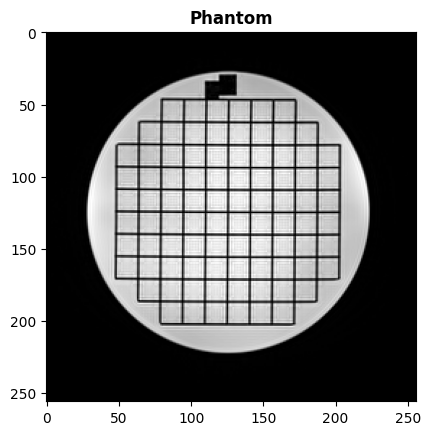

In [12]:
plt.imshow(img_gray_scale)
plt.title('Phantom', fontweight ="bold")

### Εύρεση σημείων ενδιαφέροντος

Για την εύρεση των σημείων ενδιαφέροντος - γωνιών - της εικόνας εφαρμόζεται η μέθοδος των **_Shi - Tomasi_**.

Η μέθοδος αυτή αποτελεί μία ελαφρώς καλύτερη εκδοχή του γνωστού αλγορίθμου ανίχνευσης γωνιών **_Harris_**. 

Όπου η συνάρτηση βαθμονόμησης **_R_** κάθε πίξελ προκύπτει από τη σχέση:

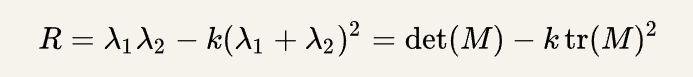

Και ο **_Μ_** είναι ένας δύο επί δύο πίνακας που υπολογίζεται από τις μερικές παραγώγους της εικόνας.

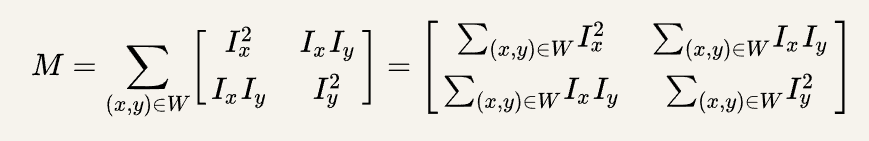

#### Μέθοδος που εφαρμόστηκε

Η διαφοροποίηση της μεθόδου των **_Shi - Tomasi_** είναι ότι η συνάρτηση βαθμονόμησης **_R_** κάθε πίξελ προκύπτει από τη νέα σχέση:

$$ R = \min (\lambda_1, \lambda_2) $$

Εάν η τιμή του **_R_** είναι μεγαλύτερη ενός συγκεκριμένου κατωφλίου που θέτουμε, τότε θεωρείται ως γωνιακό σημείο.

Σχεδιάζοντας τα _λ1_ και _λ2_ σε ένα επίπεδο στο χώρο λαμβάνουμε κάτι παρόμοιο:

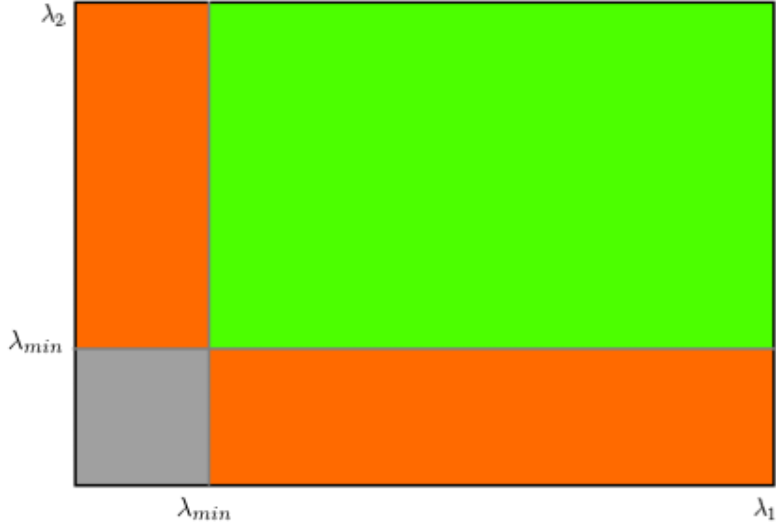

Απ' όπου διακρίνεται ότι μόνο και μόνον όταν οι τιμές των _λ1_ και _λ2_ είναι μεγαλύτερες από μία ελάχιστη τιμή _λmin_, τότε το συγκεκριμένο σημείο που μελετάται θα βρίσκεται εντός του πράσσινου εμβαδού και θα θεωρείται ως - γωνιακό - σημείο. 

Διαφορετικά, το σημείο εντάσσεται στην γκρίζα περιοχή και παραβλέπεται.

Τελευταία, έαν ένα μόνον από τα _λ1_ ή _λ2_ είναι μεγαλύτερο από την ελάχιστη τιμή _λmin_ που έχει οριστεί, τότε το **_R_** λαμβάνει τιμή ίση με τη μικρότερη εκ των _λ1_ ή _λ2_. Συνεπώς το σημείο αυτό εντάσσεται σε μία από τις κόκκινες περιοχές και δε συνυπολογίζεται ως γωνία αλλά ως _ακμή_.

#### Συνέχεια στη μέθοδο...

Αρχικά, μεταλλάσεται η εναρκτήρια έγχρωμη εικόνα πάλι σε ασπρόμαυρη μέσω της βιβλιοθήκης _open computer vision_ αυτή τη φορά για λόγους συμβατότητας ακολούθως.

In [13]:
Img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Δημιουργείται ένα ομοίωμα της εικόνας ώστε να διερευνηθεί ο αριθμός των γωνιών που περιέχει.

In [14]:
img_exploratory = Img.copy()

Ο μέγιστος αριθμός των γωνιών παραμετροποιείται ίσον με μηδέν.

Δεν προσδιορίζεται κάποιος αριθμός, ώστε να εντοπιστούν όλες οι πιθανές γωνίες.

_qualityLevel_  *  *max_qualityScore(x,y)* --> _corner threshold_

Για το βέλτιστο αποτέλεσμα η κοντινότερη απόσταση μεταξύ δύο γωνιών παραμετροποιείται ίσον με δέκα.
Η απόσταση δύο σημείων υπολογίζεται βάσει τον τύπο της Ευκλείδιας απόστασης στο επίπεδο: 
$$ L^2 norm = \sqrt{{(x-x')}^2\ +\ {(y-y')}^2} $$

In [15]:
# Shi-Tomasi corner detection method

corners = cv2.goodFeaturesToTrack(img_exploratory, maxCorners=0, qualityLevel=0.01, minDistance=10)

# image - Input 8-bit or floating-point 32-bit, single-channel image.

# maxCorners - Maximum number of corners to return. If there are more corners than are found, the strongest of them is returned.
#        if <= 0 implies that no limit on the maximum is set and all detected corners are returned.

# qualityLevel - Parameter characterizing the minimal accepted quality of image corners. See the above paragraph for explanation

# minDistance - Minimum possible Euclidean distance between the returned corners.

In [16]:
#corners = cv2.goodFeaturesToTrack(img_exploratory, -1, 0.01, 10)
# We are detecting ALL suitable corners here.

Εφόσον τα σημεία ενδιαφέροντος έχουνε βρεθεί, προκειμένου έτσι να γίνει η επισχεδίαση των γωνιών, θα πρέπει να μετατραπούν οι τιμές τους σε ακέραια μορφή.

Ειδάλλως, δε θα γίνουν αποδεκτές ως είσοδοι στην παρακάτω συνάρτηση επισχεδίασης.

In [17]:
# Conversion of corners values to integer.

corners = np.int0(corners)

Εκτύπωση ορισμένων στοιχείων.

In [18]:
print(len(corners))
print()
print(corners[0][0])
print(corners[110][0])

111

[139  92]
[171  49]


Το σύνολο των σημείων που επέστρεψε η μέθοδος είναι εκατόν-έντεκα.

Έπειτα τυπώνονται οι συντεταγμένες του πρώτου και του τελευταίου σημείου.

Ακολουθεί η αποτύπωση των συντεταγμένων του συνόλου των σημείων, από την αρχή έως το τέλος.

In [21]:
print("  {x, y} \n")

for i in corners:
    x, y = i.ravel()
    center_coordinates = (x,y)  # the center coordinates of the circle which are represented as tuples.
    cv2.circle(img_exploratory, center_coordinates, radius=4, color=(255, 255, 255), thickness=-1)
    points = [x, y]
    
    print(points)

  {x, y} 

[139, 92]
[112, 96]
[126, 78]
[110, 140]
[139, 123]
[110, 109]
[112, 127]
[156, 110]
[174, 92]
[141, 140]
[157, 79]
[141, 171]
[125, 140]
[126, 109]
[127, 158]
[156, 141]
[158, 154]
[110, 78]
[110, 171]
[170, 127]
[141, 110]
[77, 138]
[126, 63]
[139, 158]
[81, 111]
[93, 76]
[172, 140]
[124, 92]
[123, 185]
[110, 63]
[108, 154]
[172, 110]
[141, 79]
[155, 61]
[158, 92]
[158, 127]
[95, 109]
[92, 158]
[187, 110]
[189, 92]
[50, 142]
[79, 156]
[93, 96]
[189, 127]
[143, 61]
[127, 127]
[125, 171]
[62, 111]
[92, 169]
[201, 92]
[79, 125]
[65, 173]
[174, 61]
[81, 92]
[77, 169]
[189, 158]
[174, 80]
[158, 185]
[170, 158]
[96, 142]
[95, 124]
[64, 125]
[118, 33]
[158, 173]
[187, 79]
[81, 76]
[50, 111]
[50, 157]
[142, 189]
[92, 185]
[93, 61]
[187, 141]
[64, 93]
[124, 49]
[109, 187]
[79, 187]
[171, 172]
[65, 142]
[50, 126]
[159, 49]
[65, 185]
[62, 76]
[173, 185]
[125, 202]
[63, 155]
[48, 171]
[140, 202]
[185, 185]
[93, 49]
[109, 45]
[201, 127]
[201, 111]
[49, 93]
[201, 80]
[156, 202]
[79, 62]

#### Επισχεδιασμένη εικόνα

Text(0.5, 1.0, 'Junction Points')

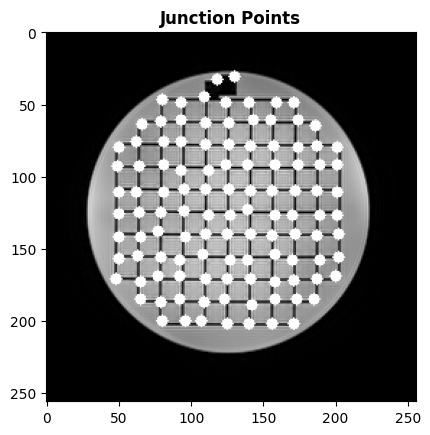

In [22]:
# Resulting image

plt.imshow(img_exploratory, cmap=plt.cm.gray)
#plt.imshow(img_exploratory) - for colored mapping

plt.title("Junction Points", fontweight ="bold")

### Συνάρτηση γωνιών  Shi-Tomasi

Ενσωμάτωση της προαναφερθέν μεθόδου στα πλαίσια μίας συνάρτησης για τη διευκόλυνση της αναπαραγωγής της μετ' έπειτα.

In [23]:
def find_junction_points(image):
    corners = cv2.goodFeaturesToTrack(image, maxCorners=111 , qualityLevel=0.01, minDistance=10)
    corners = np.int0(corners)
    points = []

    for i in corners:
        x, y = i.ravel()
        center_coordinates = (x,y)
        image = cv2.circle(image, center_coordinates, radius=3, color=(255, 255, 255), thickness=-1)
        points.append([x, y])

    plt.figure()  
    
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title("Junction Points", fontweight ="bold")
    
    return points

### Συνάρτηση παραμόρφωσης

In [24]:
def distortion(image_to_distort, k_1, k_2):
    
    height, width = [phantom.Rows, phantom.Columns]
    
    xd, yd = np.meshgrid(  np.float32(np.arange(width)), np.float32(np.arange(height)) )   # meshgrid for interpolation mapping
    
    # center and scale the grid for radius calculation (distance from center of image)
    xd_Center = width / 2 
    yd_Center = height / 2 
    xd_centered = xd  -  xd_Center
    yd_centered = yd  -  yd_Center
    xd_scaled = xd_centered / xd_Center
    yd_scaled = yd_centered / yd_Center

    radius = np.sqrt(xd_scaled**2  +  yd_scaled**2)                 # distance from the center of image
    rad_dist_model = 1  +  k_1*radius  +  k_2 * radius**2            # radial distortion model

    # apply the model 
    Xd = xd_scaled * rad_dist_model
    Yd = yd_scaled * rad_dist_model

    # reset all the shifting
    XD = Xd * xd_Center  + xd_Center
    YD = Yd * yd_Center  + yd_Center

    distorted_img = scipy.ndimage.map_coordinates( image_to_distort,  [YD.ravel(), XD.ravel()] )
    distorted_img.resize(image_to_distort.shape)
    
    return distorted_img

### Παραμόρφωση «βαρελιού»

Θα πρέπει: 

- k1 > 0
- k2 > 0

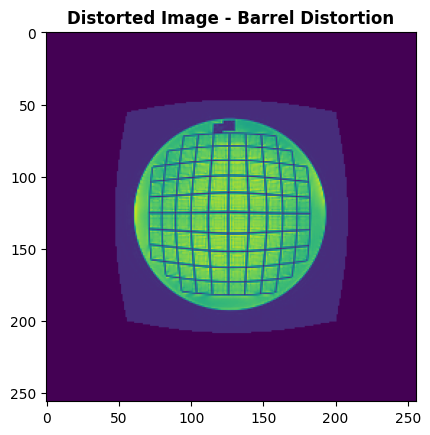

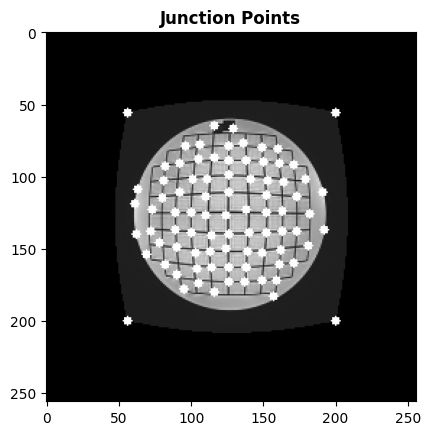

In [25]:
# Apply barrel distortion

img_barrel = Img.copy()
distorted_barrel = distortion(img_barrel, 0.8, 0.2)
plt.figure()
plt.imshow(distorted_barrel)
#plt.imshow(distorted_barrel, cmap='gray')
plt.title("Distorted Image - Barrel Distortion", fontweight ="bold")
points_barrel = find_junction_points(distorted_barrel)

In [26]:
print(len(points_barrel))

84


Παρατηρείται πως η συγκεκριμένη παραμόρφωση έχει προκαλέσει σμίκρυνση στο αντικείμενο.

Επίσης, η μέθοδος εύρεσης γωνιών έχει επιστρέψει **27** σημεία λιγότερα.

Ακόμα, μερικά από τα σημεία που επιστράφηκαν δεν παραπέμπουνε στο πλέγμα, αλλά βρίσκονται είτε επάνω στην περίμετρο της έλλειψης είτε εκτός του σχήματος εντελώς!

In [27]:
print(points_barrel)

[[126, 111], [138, 123], [111, 102], [114, 141], [138, 89], [126, 140], [152, 139], [116, 87], [140, 139], [126, 89], [141, 102], [139, 152], [138, 163], [126, 79], [149, 153], [110, 114], [152, 113], [126, 163], [124, 127], [114, 163], [113, 152], [124, 150], [150, 90], [110, 127], [100, 139], [126, 173], [103, 153], [137, 173], [104, 164], [149, 80], [153, 103], [164, 104], [105, 88], [173, 114], [173, 138], [163, 138], [89, 125], [92, 111], [101, 102], [106, 78], [89, 137], [100, 125], [90, 149], [161, 91], [162, 151], [136, 77], [80, 115], [126, 99], [152, 125], [129, 67], [90, 168], [149, 172], [82, 161], [171, 92], [105, 174], [92, 91], [81, 103], [116, 65], [161, 161], [73, 123], [179, 102], [78, 146], [182, 126], [163, 124], [181, 148], [72, 138], [159, 172], [160, 81], [96, 79], [171, 160], [116, 180], [82, 93], [95, 178], [63, 109], [200, 200], [56, 200], [200, 56], [56, 56], [191, 111], [192, 137], [62, 140], [157, 183], [61, 119], [69, 154]]


Τέρμα αριστερά κάτω γωνία.
3 βήματα επάνω.
4 βήματα δεξιά.


Παρατηρείται διολίσθηση προς τα κάτω (2 πίξελ) και δεξιά (10 πίξελ) .

In [28]:
print(corners[0][0])

print(points_barrel[10])

[139  92]
[141, 102]


Τέρμα αριστερά κάτω γωνία.
3 βήματα επάνω.
4 βήματα δεξιά.


Παρατηρείται διολίσθηση προς τα επάνω (3 πίξελ) και δεξιά (13 πίξελ).

In [ ]:
print(corners[20][0])

print(points_barrel[1])

### Παραμόρφωση «μαξιλαράκι καρφίτσας»

Θα πρέπει: 

- k1 < 0
- k2 < 0

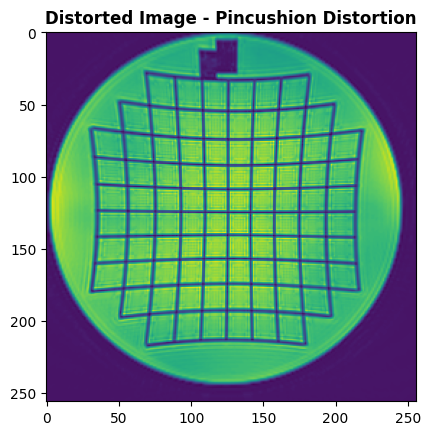

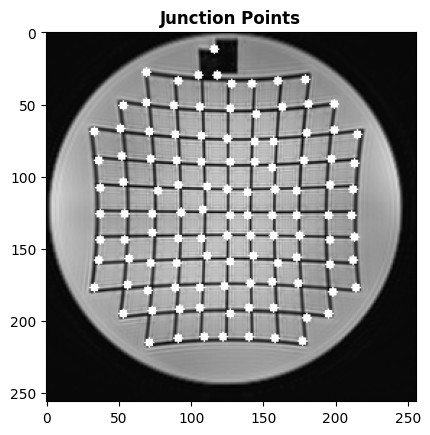

In [29]:
# Apply pincushion distortion

img_pincushion = Img.copy()
distorted_pincushion = distortion(img_pincushion, -0.15, -0.06)
plt.figure()
plt.imshow(distorted_pincushion)
#plt.imshow(distorted_pincushion, cmap='gray')
plt.title("Distorted Image - Pincushion Distortion", fontweight ="bold")
points_pincushion = find_junction_points(distorted_pincushion)

In [30]:
print(len(points_pincushion))

111


In [31]:
print(points_pincushion)

[[107, 90], [144, 90], [160, 160], [178, 89], [90, 89], [139, 127], [127, 159], [91, 106], [111, 155], [157, 76], [89, 71], [125, 141], [180, 70], [72, 88], [90, 160], [88, 51], [173, 110], [91, 143], [141, 141], [158, 109], [107, 72], [106, 52], [106, 177], [156, 94], [77, 110], [143, 155], [93, 125], [125, 109], [145, 57], [107, 143], [108, 123], [173, 127], [53, 195], [73, 139], [197, 88], [72, 160], [56, 175], [127, 127], [173, 156], [71, 69], [156, 127], [139, 111], [141, 174], [127, 53], [123, 176], [157, 141], [73, 126], [163, 52], [156, 173], [144, 76], [111, 107], [175, 141], [89, 177], [199, 68], [33, 177], [125, 74], [36, 158], [181, 50], [158, 212], [196, 106], [73, 193], [37, 108], [196, 144], [70, 179], [54, 126], [122, 211], [127, 90], [105, 30], [52, 86], [195, 127], [177, 214], [53, 104], [140, 191], [127, 195], [92, 192], [180, 198], [212, 109], [106, 191], [140, 211], [118, 30], [54, 144], [37, 144], [213, 91], [57, 157], [195, 195], [69, 49], [174, 174], [157, 191],

Τέρμα αριστερά κάτω γωνία.
3 βήματα επάνω.
3 βήματα δεξιά.


Παρατηρείται διολίσθηση προς τα κάτω (5 πίξελ) και αριστερά (2 πίξελ).

In [32]:
print(corners[0][0])

print(points_pincushion[1])

[139  92]
[144, 90]


Τέρμα αριστερά κάτω γωνία.
3 βήματα επάνω.
4 βήματα δεξιά.


Παρατηρείται διολίσθηση προς τα επάνω (2 πίξελ) και δεξιά (1 πίξελ).

In [33]:
print(corners[20][0])

print(points_pincushion[41])

[141 110]
[139, 111]


### Παραμόρφωση «μουστάκι»

Θα πρέπει: 

- k1 > 0
- k2 < 0

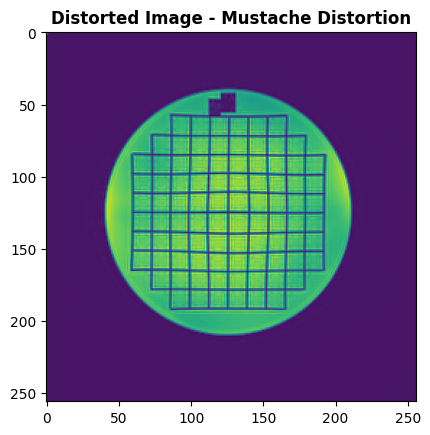

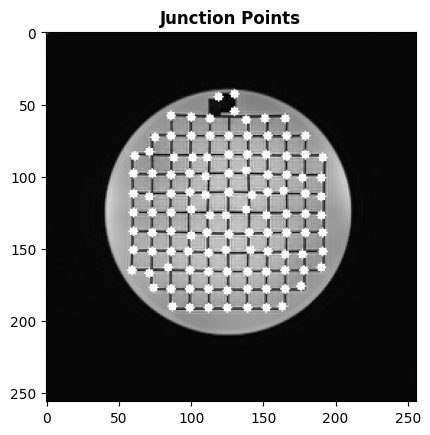

In [34]:
# Apply mustache distortion

img_mustache = Img.copy()
distorted_mustache = distortion(img_mustache, 0.7, -0.72)
plt.figure()
plt.imshow(distorted_mustache)
#plt.imshow(distorted_mustache, cmap='gray')
plt.title("Distorted Image - Mustache Distortion", fontweight ="bold")
points_mustache = find_junction_points(distorted_mustache)

In [35]:
print(len(points_mustache))

111


In [36]:
print(points_mustache)

[[153, 111], [126, 111], [152, 85], [126, 85], [140, 139], [112, 153], [110, 100], [99, 111], [139, 166], [138, 123], [166, 99], [110, 113], [112, 166], [126, 140], [86, 152], [153, 139], [142, 113], [141, 151], [125, 166], [126, 98], [139, 85], [99, 165], [113, 127], [86, 99], [124, 127], [166, 139], [100, 141], [139, 72], [138, 96], [124, 151], [112, 178], [126, 72], [153, 99], [113, 72], [73, 125], [166, 86], [111, 87], [164, 110], [111, 139], [84, 163], [152, 166], [86, 178], [179, 85], [139, 178], [73, 152], [179, 112], [153, 72], [100, 123], [165, 154], [73, 98], [98, 152], [165, 165], [190, 101], [99, 178], [153, 152], [179, 139], [125, 179], [99, 98], [86, 112], [152, 127], [101, 87], [100, 72], [152, 191], [59, 165], [60, 138], [86, 125], [177, 101], [71, 114], [73, 139], [166, 126], [152, 178], [71, 83], [60, 151], [86, 138], [130, 55], [166, 72], [71, 167], [113, 60], [60, 112], [190, 114], [60, 98], [178, 165], [177, 154], [179, 126], [191, 152], [88, 87], [165, 178], [86, 

Τέρμα αριστερά κάτω γωνία.
3 βήματα επάνω.
3 βήματα δεξιά.


Παρατηρείται διολίσθηση προς τα επάνω (1 πίξελ) και δεξιά (4 πίξελ).

In [37]:
print(corners[0][0])

print(points_mustache[28])

[139  92]
[138, 96]


Τέρμα αριστερά κάτω γωνία.
3 βήματα επάνω.
4 βήματα δεξιά.


Παρατηρείται διολίσθηση προς τα κάτω (1 πίξελ) και δεξιά (3 πίξελ).

In [38]:
print(corners[20][0])

print(points_mustache[16])

[141 110]
[142, 113]


### Παραμόρφωση «κλεψύδρα»

Θα πρέπει: 

- k1 < 0
- k2 > 0

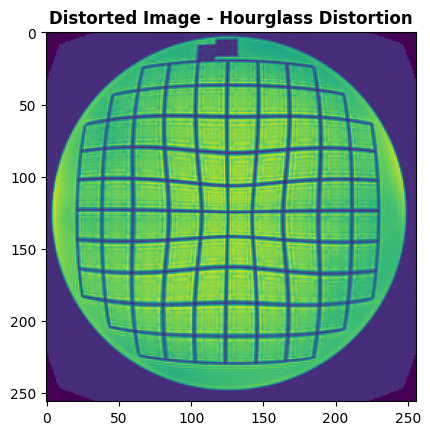

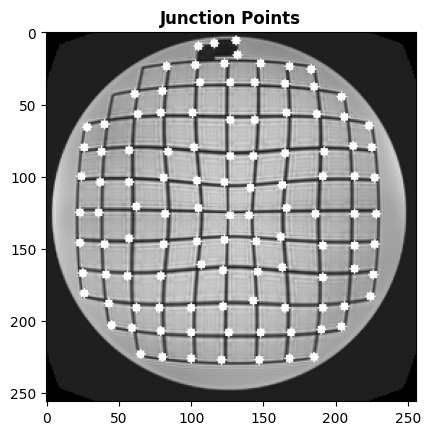

In [39]:
# Apply hourglass distortion

img_hourglass = Img.copy()
distorted_hourglass = distortion(img_hourglass, -0.93, 0.75)
plt.figure()
plt.imshow(distorted_hourglass)
#plt.imshow(distorted_hourglass, cmap='gray')
plt.title("Distorted Image - Hourglass Distortion", fontweight ="bold")
points_hourglass = find_junction_points(distorted_hourglass)

In [ ]:
print(len(points_hourglass))

In [ ]:
print(points_hourglass)

Τέρμα αριστερά κάτω γωνία.
3 βήματα επάνω.
3 βήματα δεξιά.


Παρατηρείται διολίσθηση προς τα κάτω (3 πίξελ) και αριστερά (6 πίξελ) .

In [ ]:
print(corners[0][0])

print(points_hourglass[15])

Τέρμα αριστερά κάτω γωνία.
3 βήματα επάνω.
4 βήματα δεξιά.


Παρατηρείται διολίσθηση προς τα αριστερά (<<----) κατά 2 πίξελ.

In [ ]:
print(corners[20][0])

print(points_hourglass[32])

## Βιβλιογραφία

* K. Delimbasis, classroom & e-class notes, University of Thessaly, Lamia.

* C. Harris and M. Stephens. A Combined Corner and Edge Detector. In C. J. Taylor, editors, Proceedings of the Alvey Vision Conference, pages 23.1-23.6. Alvey Vision Club, September 1988. doi:10.5244/C.2.23.

* Jianbo Shi and Tomasi, "Good features to track," 1994 Proceedings of IEEE Conference on Computer Vision and Pattern Recognition, Seattle, WA, USA, 1994, pp. 593-600, doi:10.1109/CVPR.1994.323794.

* https://www.wikiwand.com/en/Harris_corner_detector
* https://theailearner.com/2021/09/25/harris-corner-detection/
* https://docs.opencv.org/4.x/d4/d8c/tutorial_py_shi_tomasi.html
* https://theailearner.com/tag/cv2-goodfeaturestotrack/
* https://www.geeksforgeeks.org/python-corner-detection-with-shi-tomasi-corner-detection-method-using-opencv/
* https://medium.com/pixel-wise/detect-those-corners-aba0f034078b
* https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html
* https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/
* https://stackoverflow.com/questions/60609607/how-to-create-this-barrel-radial-distortion-with-python-opencv
* https://www.imatest.com/docs/distortion-methods-and-modules/
* https://www.imatest.com/docs/distortion_instructions/
* https://www.imatest.com/support/docs/pre-5-2/geometric-calibration-deprecated/distortion-models/